<a href="https://colab.research.google.com/github/Aya-Amin/Modulation-Recognition/blob/master/Assignment_3_Modulation_Recognition_M6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Load & preprocessing

###Connect to google drive 

In [0]:
!pip install PyDrive

     |████████████████████████████████| 993kB 3.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# To access google Drive\
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

download = drive.CreateFile({'id': '1r0xGZe3sjlumL7IUmV-E7_OVT3tO28mY'})
download.GetContentFile('RML2016.10b.tar.bz2')

In [0]:
# Unzipping data folder
!apt-get install p7zip-full
!p7zip -d RML2016.10b.tar.bz2
!tar -xvf RML2016.10b.tar.bz2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
/usr/bin/p7zip: RML2016.10b.tar.bz2: unknown suffix
RML2016.10b.dat
LICENSE.TXT


In [0]:
import pickle
import numpy as np

dataFile = open('RML2016.10b.dat', 'rb')
#use encoding parameter as data was pickled in python2
#Data was originally structured as a dict
dataDict = pickle.load(dataFile, encoding='latin1')   
dataFile.close()

In [0]:
print(dataDict)

{('QPSK', 2): array([[[-0.00752281, -0.00561562, -0.00440028, ..., -0.00504063,
         -0.00317084, -0.00575482],
        [ 0.00401368,  0.00268561,  0.00128211, ...,  0.01040219,
          0.00717842,  0.00407615]],

       [[-0.00175093,  0.00083702, -0.0017455 , ...,  0.0007172 ,
          0.00457201, -0.00031692],
        [-0.00236791,  0.00021756,  0.00128363, ...,  0.00915462,
          0.00923191,  0.0058996 ]],

       [[-0.00080115, -0.001983  , -0.00523791, ...,  0.00054467,
         -0.00441528, -0.00581296],
        [-0.00993724, -0.00555279, -0.00793912, ..., -0.00114739,
          0.00020742, -0.00279285]],

       ...,

       [[-0.00211105, -0.00788133, -0.00693202, ..., -0.00876567,
         -0.00567301, -0.00481623],
        [-0.00229169, -0.00789739, -0.0040146 , ..., -0.00816608,
         -0.00845601, -0.00462616]],

       [[-0.00366602, -0.00209228, -0.00727246, ...,  0.00878922,
          0.00967124,  0.00749018],
        [-0.0058285 , -0.00236692, -0.00523868,

###Reshape & split data

In [0]:
data = []
labels = []
for d in dataDict:
  signals = dataDict[d]
  for s in signals:
    data.append(np.array(s))
    labels.append(d)

data = np.array(data)
labels = np.array(labels)
print(data.shape) 
print(labels.shape)
print(labels)

(1200000, 2, 128)
(1200000, 2)
[['QPSK' '2']
 ['QPSK' '2']
 ['QPSK' '2']
 ...
 ['WBFM' '12']
 ['WBFM' '12']
 ['WBFM' '12']]


In [0]:
import random

indices = random.sample(range(0,1200000), 1200000)

xTrain = []
yTrain = []
iTrain = []
for i in range(0,600000):
  xTrain.append(data[indices[i]])
  yTrain.append(labels[indices[i]])
  iTrain.append(indices[i])
xTrain = np.array(xTrain)
yTrain = np.array(yTrain)
iTrain = np.array(iTrain)

xTest = []
yTest = []
iTest = []
for i in range(600000, 1200000):
  xTest.append(data[indices[i]])
  yTest.append(labels[indices[i]])
  iTest.append(indices[i])
xTest = np.array(xTrain)
yTest = np.array(yTrain)
iTest = np.array(iTest)  

print(xTrain.shape)
print(yTest.shape)
print(xTrain)

(600000, 2, 128)
(600000, 2)
[[[-5.14361961e-03 -2.75409757e-03 -4.88630729e-04 ... -6.61150040e-03
   -7.22562801e-03 -6.49056118e-03]
  [-6.56188931e-03 -4.54509770e-03 -2.27962225e-03 ... -7.44406413e-03
   -6.99304231e-03 -7.36910664e-03]]

 [[-3.55638564e-04 -3.80855706e-03  2.53236922e-03 ...  5.10566635e-03
    9.27254034e-04  3.10551724e-03]
  [-1.05702216e-02 -4.54070373e-03 -8.31298996e-04 ... -1.08515350e-02
    2.36045290e-03  1.67878321e-03]]

 [[-4.03035927e-04  9.84417391e-04 -1.50323915e-03 ...  3.92673165e-03
    7.84427114e-03 -1.05758954e-05]
  [ 5.99429663e-03 -1.39755663e-03  5.07895788e-03 ...  1.55867003e-02
    3.76032502e-03 -5.59067959e-03]]

 ...

 [[-2.50418931e-02 -2.02120445e-03  3.07104725e-04 ...  3.19751864e-03
    2.96430546e-03 -1.42222852e-03]
  [-1.28069101e-03 -7.36000761e-03  3.16833216e-03 ... -9.55154374e-03
    9.23449919e-03 -1.36335846e-03]]

 [[ 8.93179886e-03  9.20316763e-03  7.44907465e-03 ...  4.36560018e-03
    4.22653463e-03  4.54065995

###One-hot encoding of labels

In [0]:
#Sklearn’s one hot encoder doesn’t actually know how to convert categories to numbers, 
#it only knows how to convert numbers to binary. We have to use the labelencoder first.

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()

yTrain_SNR = yTrain[:,1]
yTest_SNR = yTest[:,1]

print(yTest[400000])
print(yTest_SNR[400000])

yTrain_le = le.fit_transform(yTrain[:, 0])
yTest_le = le.fit_transform(yTest[:, 0])
print(yTest_le[400000])

yTrain_le = yTrain_le.reshape(len(yTrain_le), 1)
yTest_le = yTest_le.reshape(len(yTest_le), 1)

enc = OneHotEncoder(categorical_features = [0])
yTrain_ohe = enc.fit_transform(yTrain_le).toarray()
yTest_ohe = enc.fit_transform(yTest_le).toarray()
print(yTest_ohe[400000])


['8PSK' '14']
14
0


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data w

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


##Neural Networks


###CNN


In [0]:
#np.random.seed(7)

from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Flatten, Dense, Reshape
from keras import optimizers

model = Sequential()
model.add(Reshape((1,2,128), input_shape=(2,128)))
model.add(Conv2D(filters=64, kernel_size=(1,3), data_format='channels_first', activation='relu', padding='valid'))
model.add(Conv2D(filters=16, kernel_size=(2,3), data_format='channels_first', activation='relu', padding='valid'))
#zero padding to get 128?!
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1, 2, 128)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 2, 126)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 1, 124)        6160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1984)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               254080    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 261,786
Trainable params: 261,786
Non-trainable params: 

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
	
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True, verbose=1)
model.fit(xTrain, yTrain_ohe, validation_split=0.05, shuffle=True, batch_size=1000, epochs=100, verbose=1, callbacks=[es, mc])

#model.fit(xTrain, yTrain_ohe, validation_split=0.05, shuffle=True, batch_size=1024, epochs=50, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 570000 samples, validate on 30000 samples
Epoch 1/100
570000/570000 [==============================] - 11s 18us/step - loss: 1.9464 - acc: 0.2368 - val_loss: 1.6575 - val_acc: 0.3454

Epoch 00001: val_acc improved from -inf to 0.34540, saving model to best_model.h5
Epoch 2/100
570000/570000 [==============================] - 6s 11us/step - loss: 1.5048 - acc: 0.3966 - val_loss: 1.4293 - val_acc: 0.4197

Epoch 00002: val_acc improved from 0.34540 to 0.41970, saving model to best_model.h5
Epoch 3/100
570000/570000 [==============================] - 6s 11us/step - loss: 1.3802 - acc: 0.4397 - val_loss: 1.3210 - val_acc: 0.4649

Epoch 00003: val_acc improved from 0.41970 to 0.46487, saving model to best_model.h5
Epoch 4/100
570000/570000 [==============================] - 7s 12us/step - loss: 1.2883 - acc: 0.4713 - val_loss: 1.2727 - val_acc: 0.4760

Epoch 00004: val_acc improved from 0.46487 to 0.47603, saving model to best_model.h5

###Evaluate Test set

In [0]:
from keras.models import load_model
saved_model = load_model('best_model.h5')

SNR = np.unique(labels[:,1])
SNR = list(map(int, SNR))
SNR.sort()
SNR = list(map(str, SNR))

accuracy = []

for s in SNR:
  y = []
  x = []
  M = np.where(yTest_SNR == s)
  for m in M[0]:
    y.append(yTest_ohe[m])
    x.append(xTest[m])
    
  y = np.array(y)
  x = np.array(x)
  loss, acc = saved_model.evaluate(x, y)
  print('Accuracy for SNR = ', s, ' is ', acc)
  accuracy.append(acc)
  
print(accuracy)

30124/30124 [==============================] - 2s 50us/step
Accuracy for SNR =  -20  is  0.17593945027319752
30094/30094 [==============================] - 1s 46us/step
Accuracy for SNR =  -18  is  0.17289160630174466
30237/30237 [==============================] - 1s 47us/step
Accuracy for SNR =  -16  is  0.19370307901236425
29938/29938 [==============================] - 1s 48us/step
Accuracy for SNR =  -14  is  0.23147838867290424
29728/29728 [==============================] - 1s 46us/step
Accuracy for SNR =  -12  is  0.289995963401507
29797/29797 [==============================] - 1s 46us/step
Accuracy for SNR =  -10  is  0.3812464342052858
29878/29878 [==============================] - 1s 47us/step
Accuracy for SNR =  -8  is  0.4679028047352832
29884/29884 [==============================] - 1s 47us/step
Accuracy for SNR =  -6  is  0.5841922098821848
30188/30188 [==============================] - 1s 45us/step
Accuracy for SNR =  -4  is  0.6800053001153038
30019/30019 [===============

##Accuracy Plot

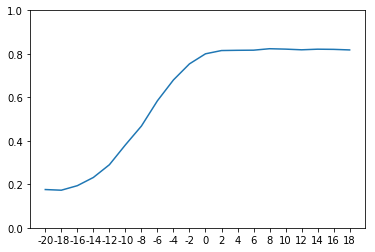

In [0]:
import matplotlib.pyplot as plt
plt.ylim(0, 1.0)
plt.plot(SNR, accuracy)

##Extra features


###Features Extraction - Integration

In [0]:
import scipy

xTrainInteg = []
for x in xTrain:
  xInteg = np.array(scipy.integrate.simps(x))
  xTrainInteg.append(xInteg)
xTrainInteg = np.array(xTrainInteg)
print(xTrainInteg.shape)
print(xTrainInteg)

xTestInteg = []
for x in xTest:
  xInteg = np.array(scipy.integrate.simps(x))
  xTestInteg.append(xInteg)
xTestInteg = np.array(xTestInteg)

(600000, 2)
[[-0.02019633  0.34513912]
 [ 0.35724726 -0.54975224]
 [ 0.22867891  0.05299301]
 ...
 [-0.25808132  0.04752271]
 [-0.05092151 -0.13915287]
 [ 0.06180311 -0.02097323]]


####CNN


In [0]:
#np.random.seed(7)

from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Flatten, Dense, Reshape
from keras import optimizers

model2 = Sequential()
model2.add(Reshape((1,1,2), input_shape=(1,2)))
model2.add(Conv2D(filters=64, kernel_size=(1,2), data_format='channels_last', activation='relu', padding='valid'))
model2.add(Conv2D(filters=16, kernel_size=(1,1), data_format='channels_last', activation='relu', padding='valid'))
#zero padding to get 128?!
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

ValueError: ignored

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
	
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True, verbose=1)
model.fit(xTrain, yTrain_ohe, validation_split=0.05, shuffle=True, batch_size=1000, epochs=100, verbose=1, callbacks=[es, mc])

#model.fit(xTrain, yTrain_ohe, validation_split=0.05, shuffle=True, batch_size=1024, epochs=50, verbose=1)

In [0]:
from keras.models import load_model
saved_model = load_model('best_model.h5')

SNR = np.unique(labels[:,1])
SNR = list(map(int, SNR))
SNR.sort()
SNR = list(map(str, SNR))

accuracy = []

for s in SNR:
  y = []
  x = []
  M = np.where(yTest_SNR == s)
  for m in M[0]:
    y.append(yTest_ohe[m])
    x.append(xTest[m])
    
  y = np.array(y)
  x = np.array(x)
  loss, acc = saved_model.evaluate(x, y)
  print('Accuracy for SNR = ', s, ' is ', acc)
  accuracy.append(acc)
  
print(accuracy)

###Features Extraction - Differentiation

In [0]:
xTrainDiff = []
for x in xTrain:
  xDiff = np.array(np.gradient(x))
  xTrainDiff.append(np.vstack((xDiff[0], xDiff[1])))
xTrainDiff = np.array(xTrainDiff)
print(xTrainDiff.shape)
#print(xTrainDiff)

xTestDiff = []
for x in xTest:
  xDiff = np.array(np.gradient(x))
  xTestDiff.append(np.vstack((xDiff[0], xDiff[1])))
xTestDiff = np.array(xTestDiff)

(600000, 4, 128)


In [0]:
#np.random.seed(7)

from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Flatten, Dense, Reshape
from keras import optimizers

model2 = Sequential()
model2.add(Reshape((1,4,128), input_shape=(4,128)))
model2.add(Conv2D(filters=64, kernel_size=(1,3), data_format='channels_first', activation='relu', padding='valid'))
model2.add(Conv2D(filters=16, kernel_size=(2,3), data_format='channels_first', activation='relu', padding='valid'))
#zero padding to get 128?!
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1, 4, 128)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 4, 126)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 3, 124)        6160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 5952)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               761984    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 769,690
Trainable params: 769,690
Non-trainable params: 

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
	
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('best_model2.h5', monitor='val_acc', mode='max', save_best_only=True, verbose=1)
model2.fit(xTrainDiff, yTrain_ohe, validation_split=0.05, shuffle=True, batch_size=1000, epochs=100, verbose=1, callbacks=[es, mc])

#model.fit(xTrain, yTrain_ohe, validation_split=0.05, shuffle=True, batch_size=1024, epochs=50, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 570000 samples, validate on 30000 samples
Epoch 1/100
570000/570000 [==============================] - 16s 29us/step - loss: 1.9611 - acc: 0.2308 - val_loss: 1.7415 - val_acc: 0.3112

Epoch 00001: val_acc improved from -inf to 0.31117, saving model to best_model2.h5
Epoch 2/100
570000/570000 [==============================] - 12s 21us/step - loss: 1.6355 - acc: 0.3529 - val_loss: 1.6004 - val_acc: 0.3649

Epoch 00002: val_acc improved from 0.31117 to 0.36487, saving model to best_model2.h5
Epoch 3/100
570000/570000 [==============================] - 12s 21us/step - loss: 1.5215 - acc: 0.3936 - val_loss: 1.4769 - val_acc: 0.4059

Epoch 00003: val_acc improved from 0.36487 to 0.40590, saving model to best_model2.h5
Epoch 4/100
570000/570000 [==============================] - 12s 21us/step - loss: 1.4488 - acc: 0.4179 - val_loss: 1.4248 - val_acc: 0.4304

Epoch 00004: val_acc improved from 0.40590 to 0.43037, saving model to best_mo

In [0]:
from keras.models import load_model
saved_model2 = load_model('best_model2.h5')

SNR = np.unique(labels[:,1])
SNR = list(map(int, SNR))
SNR.sort()
SNR = list(map(str, SNR))

accuracy = []

for s in SNR:
  y = []
  x = []
  M = np.where(yTest_SNR == s)
  for m in M[0]:
    y.append(yTest_ohe[m])
    x.append(xTestDiff[m])
    
  y = np.array(y)
  x = np.array(x)
  loss, acc = saved_model2.evaluate(x, y)
  print('Accuracy for SNR = ', s, ' is ', acc)
  accuracy.append(acc)
  
print(accuracy)

30128/30128 [==============================] - 2s 56us/step
Accuracy for SNR =  -20  is  0.19433749336165693
29960/29960 [==============================] - 2s 52us/step
Accuracy for SNR =  -18  is  0.19242323097463285
29966/29966 [==============================] - 2s 52us/step
Accuracy for SNR =  -16  is  0.202129079626557
29936/29936 [==============================] - 2s 52us/step
Accuracy for SNR =  -14  is  0.22043693212185997
30047/30047 [==============================] - 2s 52us/step
Accuracy for SNR =  -12  is  0.25683096481880363
29945/29945 [==============================] - 2s 52us/step
Accuracy for SNR =  -10  is  0.3227249958226947
30017/30017 [==============================] - 2s 56us/step
Accuracy for SNR =  -8  is  0.39824099676849783
29886/29886 [==============================] - 2s 58us/step
Accuracy for SNR =  -6  is  0.48581275513618416
29957/29957 [==============================] - 2s 60us/step
Accuracy for SNR =  -4  is  0.5864071836338488
30030/30030 [=============

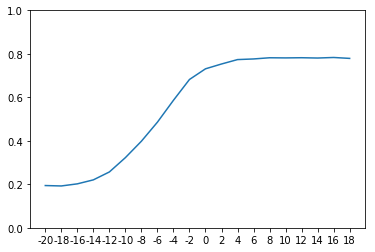

In [0]:
import matplotlib.pyplot as plt
plt.ylim(0, 1.0)
plt.plot(SNR, accuracy)